In [ ]:
import pandas as pd         # data manupulation
import re                   # for calculation and pattern making
import nltk                 # natural language tool kit , part of NLP


In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stemmer = PorterStemmer()

In [5]:
stop_words = set(stopwords.words("english"))

In [6]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Email_Spam_Detection.csv", encoding='latin-1')[['v1', 'v2']]


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [12]:
df.tail(2)

,v1,v2
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [22]:
df.rename(columns={df.columns[0]: 'label', df.columns[1]: 'message'}, inplace=True)

In [23]:
df = pd.read_csv("Email_Spam_Detection.csv", encoding='latin1', usecols=[0, 1])
df.columns = ['label', 'message']


In [24]:
df = df.iloc[:, :2]  # Keep only first two columns
df.columns = ['label', 'message']


In [25]:
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing

In [26]:
def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

In [27]:
df["cleaned_message"] = df["message"].apply(preprocess_text)

In [29]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [30]:
df.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer  # converting text into numeric format

In [32]:
from sklearn.model_selection import train_test_split         # distributing the data into trannning and testing for prediction

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



# importing Data Science - ML Libraries using SKLEARN

# Feature Extraction

# Test Your Model

In [38]:
def predict_spam(message):
    msg = preprocess_text(message)
    vec = tfidf.transform([msg])
    return "Spam" if model.predict(vec)[0] == 1 else "Not Spam"

print(predict_spam("Congratulations! You have won a free lottery ticket. Call now!"))
print(predict_spam("Win $1000 now! Click here!"))

Not Spam
Spam


# Shows how well the model is predicting spam vs not spam.

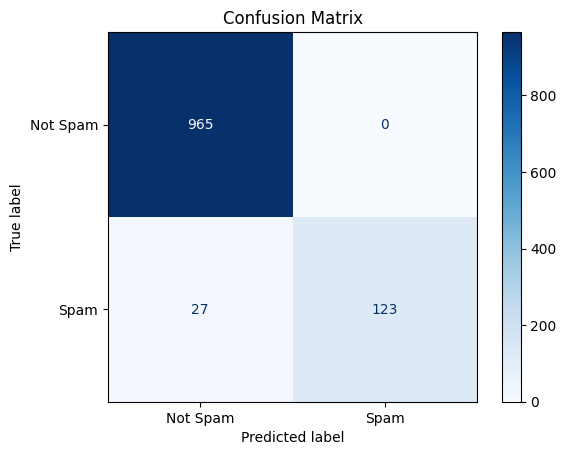

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Visualizes precision, recall, and F1-score.

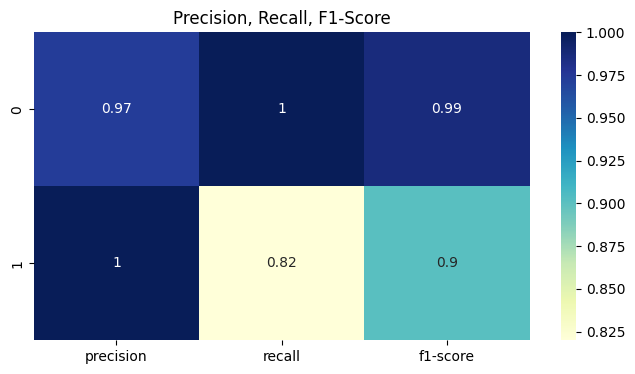

In [40]:
from sklearn.metrics import classification_report
import seaborn as sns

# Get report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:, :3], annot=True, cmap="YlGnBu")
plt.title("Precision, Recall, F1-Score")
plt.show()


# Spam vs Not Spam Count in Dataset

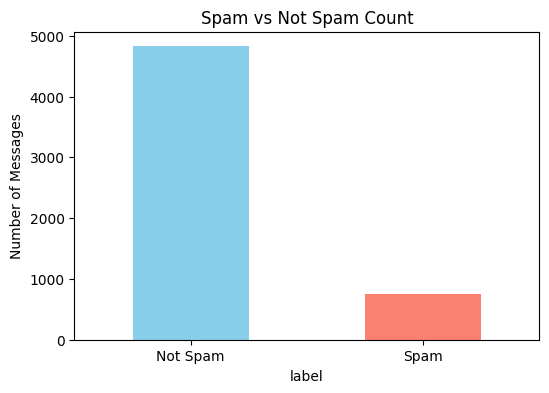

In [41]:
# Count of spam and ham in the original dataset
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.title("Spam vs Not Spam Count")
plt.ylabel("Number of Messages")
plt.show()


In [ ]:
###########################################################################################################################3

In [42]:
from sklearn.linear_model import LogisticRegression

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, pred))

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.74      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

